<div style="background-color: black; color: white; font-size: 30px; font-weight: bold; padding: 10px;">
Image Classification
    
    
    

In [49]:
# Basic libs

import numpy as np
import pandas as pd

# Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# NO WARNINGS!!!
from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
import os
import pandas as pd

def get_file_info(directory):
    file_info = []
    for foldername, subfolders, filenames in os.walk(directory):
        for filename in filenames:
            full_path = os.path.join(foldername, filename)
            size = os.path.getsize(full_path)
            last_modified = os.path.getmtime(full_path)
            file_info.append([foldername, filename, size, last_modified])
    return file_info

# Specify the directories
directories = ['C:/Users/ghada/OneDrive/Bureau/imageBD/train', 'C:/Users/ghada/OneDrive/Bureau/imageBD/test']

# Get file info for all directories
all_file_info = []
for directory in directories:
    all_file_info.extend(get_file_info(directory))

# Create a DataFrame
df = pd.DataFrame(all_file_info, columns=['Folder', 'File', 'Size', 'Last Modified'])

# create some new columns
df['test_train'] = df['Folder'].apply(lambda x: 'test' if 'test' in x else 'train')
df['diagnosis'] = df['Folder'].apply(lambda x: 'Malignant' if 'Malignant' in x else 'Benign')

# correct date and create year column
df['Last Modified'] = pd.to_datetime(df['Last Modified'], unit='s')
df['Last Modified Year'] = df['Last Modified'].dt.year

# Display the DataFrame
df

,Folder,File,Size,Last Modified,test_train,diagnosis,Last Modified Year
0,C:/Users/ghada/OneDrive/Bureau/imageBD/train\B...,1.jpg,3982,2024-03-29 09:28:09.803673856,train,Benign,2024
1,C:/Users/ghada/OneDrive/Bureau/imageBD/train\B...,10.jpg,5168,2024-03-29 09:28:09.847790080,train,Benign,2024
2,C:/Users/ghada/OneDrive/Bureau/imageBD/train\B...,100.jpg,4482,2024-03-29 09:28:09.889380352,train,Benign,2024
3,C:/Users/ghada/OneDrive/Bureau/imageBD/train\B...,1000.jpg,5354,2024-03-29 09:28:09.930244608,train,Benign,2024
4,C:/Users/ghada/OneDrive/Bureau/imageBD/train\B...,1001.jpg,5223,2024-03-29 09:28:09.973765632,train,Benign,2024
...,...,...,...,...,...,...,...
13874,C:/Users/ghada/OneDrive/Bureau/imageBD/test\Ma...,6598.jpg,4257,2024-03-29 09:28:09.556219136,test,Malignant,2024
13875,C:/Users/ghada/OneDrive/Bureau/imageBD/test\Ma...,6599.jpg,6602,2024-03-29 09:28:09.609493504,test,Malignant,2024
13876,C:/Users/ghada/OneDrive/Bureau/imageBD/test\Ma...,6600.jpg,7317,2024-03-29 09:28:09.655567104,test,Malignant,2024
13877,C:/Users/ghada/OneDrive/Bureau/imageBD/test\Ma...,6601.jpg,6024,2024-03-29 09:28:09.701385472,test,Malignant,2024


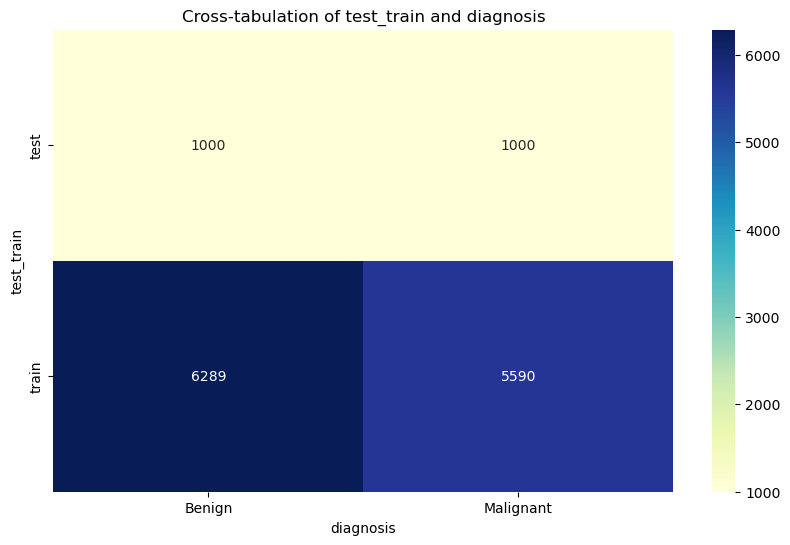

In [35]:
# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(df['test_train'], df['diagnosis'])

# Plot the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Cross-tabulation of test_train and diagnosis')
plt.show()

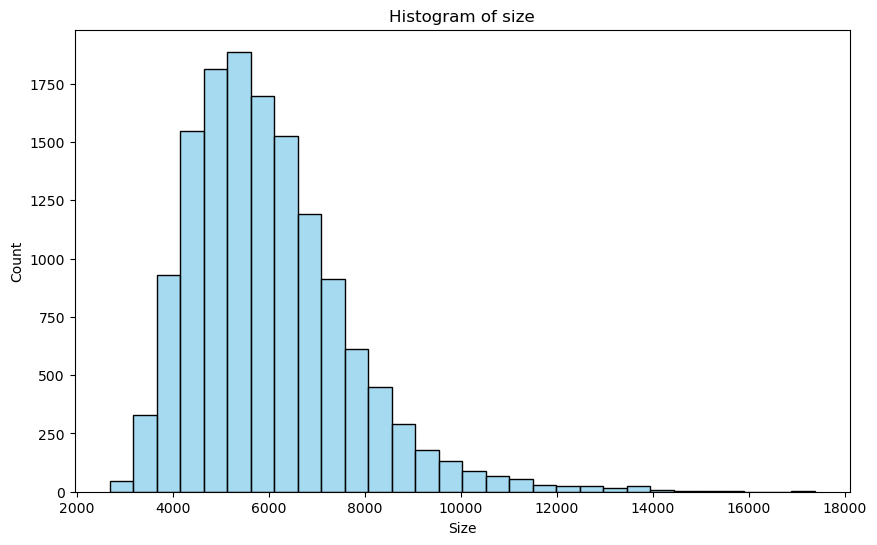

In [36]:
# Plot a histogram of the 'size' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Size'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

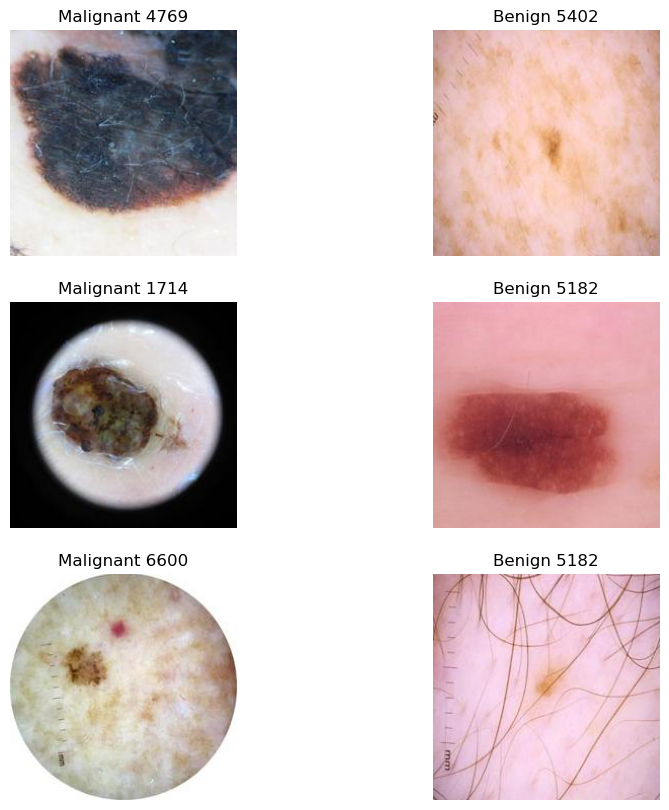

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the images
img1 = Image.open('C:/Users/ghada/OneDrive/Bureau/imageBD/train/Malignant/4769.jpg')
img2 = Image.open('C:/Users/ghada/OneDrive/Bureau/imageBD/train/Benign/5402.jpg')
img3 = Image.open('C:/Users/ghada/OneDrive/Bureau/imageBD/train/Malignant/3034.jpg')
img4 = Image.open('C:/Users/ghada/OneDrive/Bureau/imageBD/train/Benign/692.jpg')
img5 = Image.open('C:/Users/ghada/OneDrive/Bureau/imageBD/test/Malignant/6600.jpg')
img6 = Image.open('C:/Users/ghada/OneDrive/Bureau/imageBD/test/Benign/7080.jpg')

# Create a figure with four subplots
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

# Display the images
ax[0, 0].imshow(img1)
ax[0, 0].axis('off')  # don't show the axes for the image
ax[0, 0].set_title('Malignant 4769')

ax[0, 1].imshow(img2)
ax[0, 1].axis('off')  # don't show the axes for the image
ax[0, 1].set_title('Benign 5402')

ax[1, 0].imshow(img3)
ax[1, 0].axis('off')  # don't show the axes for the image
ax[1, 0].set_title('Malignant 1714')

ax[1, 1].imshow(img4)
ax[1, 1].axis('off')  # don't show the axes for the image
ax[1, 1].set_title('Benign 5182')

ax[2, 0].imshow(img5)
ax[2, 0].axis('off')  # don't show the axes for the image
ax[2, 0].set_title('Malignant 6600')

ax[2, 1].imshow(img6)
ax[2, 1].axis('off')  # don't show the axes for the image
ax[2, 1].set_title('Benign 5182')

plt.show()


In [38]:
import os
import random
from PIL import Image

# Define the directories
directories = ["C:/Users/ghada/OneDrive/Bureau/imageBD/test/Benign", 
               "C:/Users/ghada/OneDrive/Bureau/imageBD/test/Malignant",
               "C:/Users/ghada/OneDrive/Bureau/imageBD/train/Benign",
               "C:/Users/ghada/OneDrive/Bureau/imageBD/train/Malignant"]

# Initialize a list to store the images
images = []
labels = []

# Loop over the directories
for directory in directories:
    # Get a list of all the image files in the directory
    files = os.listdir(directory)
    
    # Check if the number of files is less than 100
    if len(files) < 100:
        # If there are less than 100 files, sample all of them
        selected_files = files
    else:
        # Randomly select 100 files
        selected_files = random.sample(files, 100)
    
    # Open the images and add them to the list
    for file in selected_files:
        img = Image.open(os.path.join(directory, file))
        images.append(img)
        
        # Add the label to the labels list
        if "Benign" in directory:
            labels.append(0)  # Assign 0 for Benign
        else:
            labels.append(1)  # Assign 1 for Malignant

# Now, 'images' is a list of PIL Image objects and 'labels' is a list of corresponding labels

# Print image import count
print("Imported images:", len(images))
print("Image labels:", len(labels))


Imported images: 400
Image labels: 400


## Dominant Color Extraction (top 3 per label)

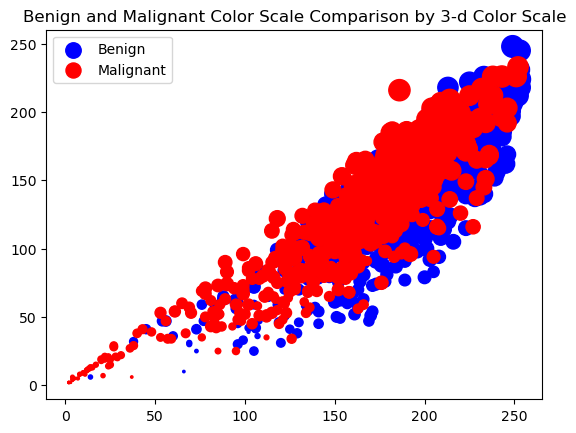

F-value: 82.1662995519726 This is high...
p-value: 4.975629763613672e-19 p-value < 0.05 indicates difference in populations


In [39]:
# Import necessary libraries
import os
import random
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt

# Function to get dominant colors
def get_dominant_colors(image, n_colors):
    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    
    # Perform K-means clustering to find the most dominant colors
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(pixels)
    
    # Get the RGB values of the cluster centers
    colors = kmeans.cluster_centers_
    
    # Convert the colors to integers
    colors = colors.round(0).astype(int)
    
    return colors

# Define the directories
directories = ["C:/Users/ghada/OneDrive/Bureau/imageBD/test/Benign", 
               "C:/Users/ghada/OneDrive/Bureau/imageBD/test/Malignant",
               "C:/Users/ghada/OneDrive/Bureau/imageBD/train/Benign",
               "C:/Users/ghada/OneDrive/Bureau/imageBD/train/Malignant"]

# Initialize a list to store the images and their labels
images = []
labels = []

# Loop over the directories
for directory in directories:
    # Get a list of all the image files in the directory
    files = os.listdir(directory)
    
    # Randomly select x files
    selected_files = random.sample(files, 100)
    
    # Open the images and add them to the list
    for file in selected_files:
        img = Image.open(os.path.join(directory, file))
        images.append(img)
        
        # Add the label to the labels list
        if "Benign" in directory:
            labels.append("Benign")
        else:
            labels.append("Malignant")

# Initialize a dictionary to store the dominant colors for each label
dominant_colors = {"Benign": [], "Malignant": []}

# Loop over the images and their labels
for image, label in zip(images, labels):
    # Convert the image from a PIL Image object to a NumPy array
    image = np.array(image)
    
    # Get the 3 most dominant colors in the image
    colors = get_dominant_colors(image, 3)
    
    # Add the colors to the list for this label
    dominant_colors[label].extend(colors)

# Initialize lists to store the coordinates for each label
benign_colors = np.array(dominant_colors["Benign"])
malignant_colors = np.array(dominant_colors["Malignant"])

# Create a scatter plot for each label
plt.scatter(benign_colors[:, 0], benign_colors[:, 1], benign_colors[:, 2], c='b', label='Benign')
plt.scatter(malignant_colors[:, 0], malignant_colors[:, 1], malignant_colors[:, 2], c='r', label='Malignant')

# Add a legend
plt.legend()
plt.title("Benign and Malignant Color Scale Comparison by 3-d Color Scale")

# Show the plot
plt.show()

# Perform ANOVA
f_val, p_val = stats.f_oneway(benign_colors.mean(axis=1), malignant_colors.mean(axis=1))

# Print F-value and p-value
print("F-value:", f_val, "This is high...")
print("p-value:", p_val, "p-value < 0.05 indicates difference in populations")


## Contrast Analysis

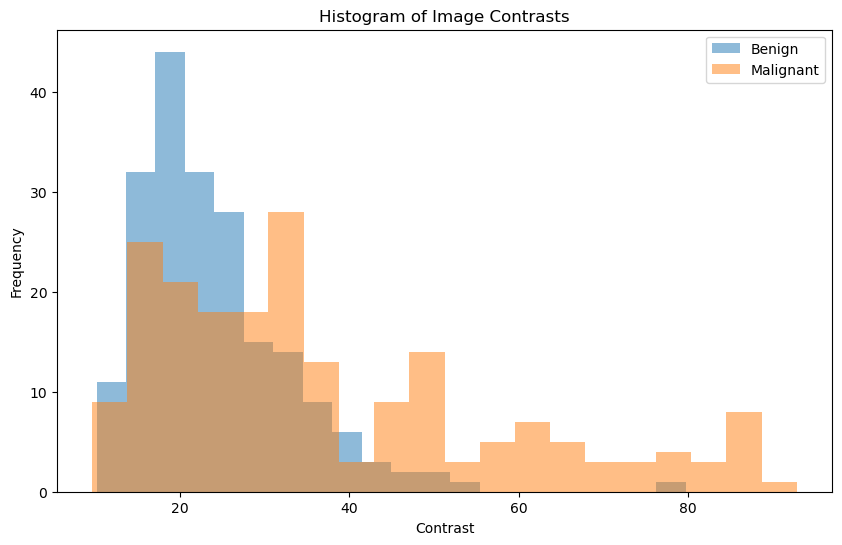

F-value: 70.25422181293338
If the populations were the same this would be lower
p-value: 9.089815578026944e-16
p-value < 0.05 indicates significant difference in populations


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Function to calculate image contrast
def calculate_contrast(image):
    image = np.array(image.convert('L'))  # Convert image to grayscale
    return image.std()  # Standard deviation as contrast measure

# Calculate contrast for each image
contrasts = [calculate_contrast(img) for img in images]

# Separate contrasts by label
benign_contrasts = [contrast for contrast, label in zip(contrasts, labels) if label == 'Benign']
malignant_contrasts = [contrast for contrast, label in zip(contrasts, labels) if label == 'Malignant']

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(benign_contrasts, bins=20, alpha=0.5, label='Benign')
plt.hist(malignant_contrasts, bins=20, alpha=0.5, label='Malignant')
plt.title('Histogram of Image Contrasts')
plt.xlabel('Contrast')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Perform ANOVA test
f_val, p_val = f_oneway(benign_contrasts, malignant_contrasts)

# Print F-value and p-value
print("F-value:", f_val)
if f_val > 1:
    print("If the populations were the same this would be lower")
else:
    print("This is low and means the populations are likely similar")
print("p-value:", p_val)
if p_val < 0.05:
    print("p-value < 0.05 indicates significant difference in populations")
else:
    print("p-value >= 0.05 indicates no significant difference in populations")

## Texture Analysis

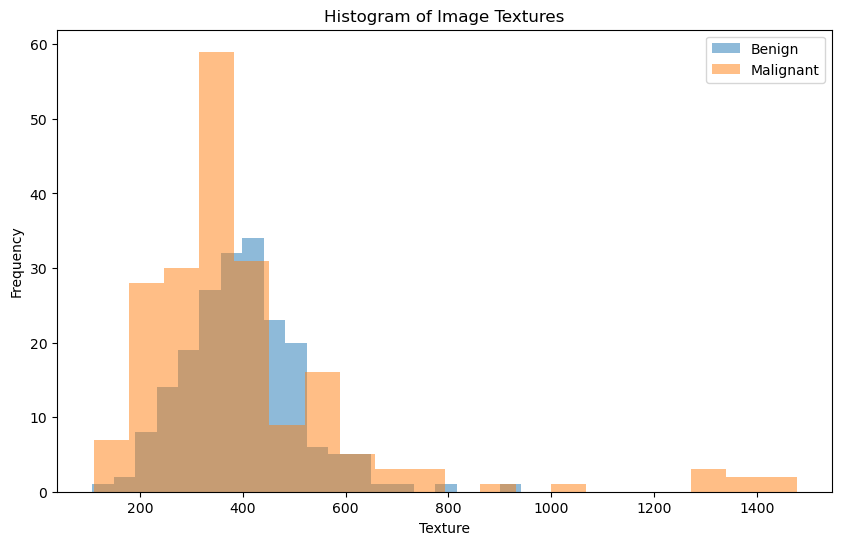

F-value: 0.1350963322206677
This is low and means the populations are likely similar
p-value: 0.7134007973761294
p-value >= 0.05 indicates no significant difference in populations


In [41]:
import cv2
import matplotlib.pyplot as plt

# Function to calculate image texture
def calculate_texture(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)  # Convert image to grayscale
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])  # Compute histogram
    return hist.std()  # Standard deviation as texture measure

# Calculate texture for each image
textures = [calculate_texture(img) for img in images]

# Separate textures by label
benign_textures = [texture for texture, label in zip(textures, labels) if label == 'Benign']
malignant_textures = [texture for texture, label in zip(textures, labels) if label == 'Malignant']

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(benign_textures, bins=20, alpha=0.5, label='Benign')
plt.hist(malignant_textures, bins=20, alpha=0.5, label='Malignant')
plt.title('Histogram of Image Textures')
plt.xlabel('Texture')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Perform ANOVA test
f_val, p_val = f_oneway(benign_textures, malignant_textures)

# Print F-value and p-value
print("F-value:", f_val)
if f_val > 1:
    print("If the populations were the same this would be lower")
else:
    print("This is low and means the populations are likely similar")
print("p-value:", p_val)
if p_val < 0.05:
    print("p-value < 0.05 indicates significant difference in populations")
else:
    print("p-value >= 0.05 indicates no significant difference in populations")

<div style="background-color: black; color: white; font-size: 30px; font-weight: bold; padding: 10px;">
Create Consolidated Dataset
</div>

## Analysis of data

In [42]:
# Generate consolidated dataframe

# Initialize a list to store the colors and their labels
color_data = []

# Loop over the images and their labels
for image, label in zip(images, labels):
    # Convert the image from a PIL Image object to a NumPy array
    image = np.array(image)
    
    # Get the 3 most dominant colors in the image
    colors = get_dominant_colors(image, 3)
    
    # Flatten the colors array and add the label
    flattened_colors = colors.flatten()
    color_data.append(np.append(flattened_colors, label))

# Create a DataFrame
image_data = pd.DataFrame(color_data, columns=['r1', 'g1', 'b1', 'r2', 'g2', 'b2', 'r3', 'g3', 'b3', 'label'])

# Add additional coluns
image_data['contrast'] = contrasts
image_data['texture'] = textures

# Create binary code for condition
image_data['Malignant'] = np.where(image_data['label'] == 'Malignant', 1, 0)

# Drop original label
image_data.drop('label', axis=1, inplace=True)

image_data.head(2)

,r1,g1,b1,r2,g2,b2,r3,g3,b3,contrast,texture,Malignant
0,219,187,156,165,117,85,194,153,120,28.763236,252.864090,0
1,174,161,158,96,45,30,151,103,76,37.942824,520.128113,0


In [43]:
# Force numeric columns

numeric_cols = ['r1', 'g1', 'b1', 'r2', 'g2', 'b2', 'r3', 'g3', 'b3']
for col in numeric_cols:
    image_data[col] = pd.to_numeric(image_data[col], errors='coerce')
    
# Scale all values except target (not required for all algorithms)
from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
# Specify the method as either "box-cox" or "yeo-johnson"
# Specify the standardize parameter as True to scale the data to have zero mean and unit variance
pt = PowerTransformer(method="yeo-johnson", standardize=True)

# Select the columns to scale from the numeric_cols list
X = image_data.drop("Malignant", axis=1)

# Fit and transform the selected columns
X_scaled = pt.fit_transform(X)

# Convert the scaled values to a DataFrame and add the column "Malignant"
image_data = pd.DataFrame(X_scaled, columns=X.columns).join(image_data["Malignant"])


In [44]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   r1         400 non-null    float64
 1   g1         400 non-null    float64
 2   b1         400 non-null    float64
 3   r2         400 non-null    float64
 4   g2         400 non-null    float64
 5   b2         400 non-null    float64
 6   r3         400 non-null    float64
 7   g3         400 non-null    float64
 8   b3         400 non-null    float64
 9   contrast   400 non-null    float64
 10  texture    400 non-null    float64
 11  Malignant  400 non-null    int32  
dtypes: float64(11), int32(1)
memory usage: 36.1 KB


<div style="background-color: black; color: white; font-size: 30px; font-weight: bold; padding: 10px;">
Random Forest Classifier
</div>

Best parameters found by grid search are: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        42
           1       0.72      0.76      0.74        38

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



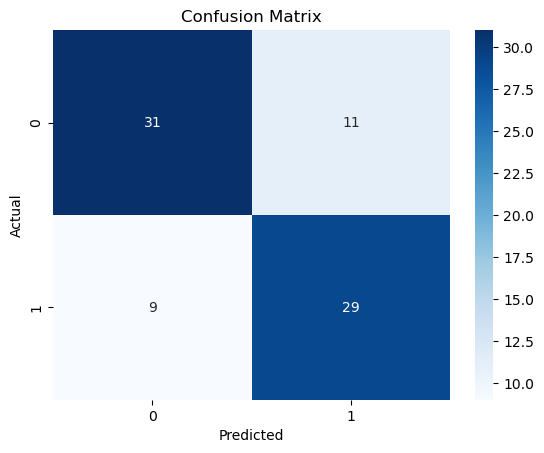

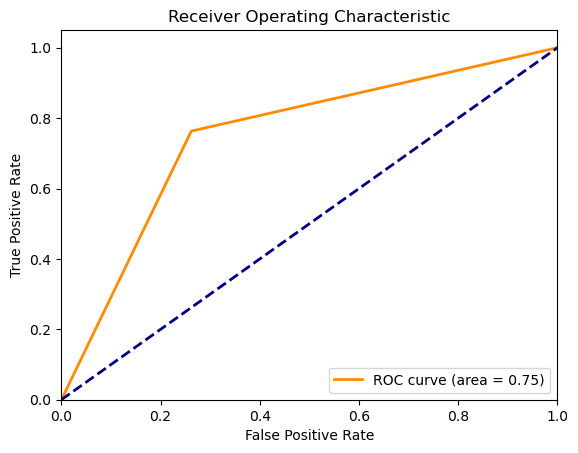

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create X and y from the DataFrame
X = image_data.drop("Malignant", axis=1) # X contains all the features except the label column
y = image_data["Malignant"] # y contains the label column

# Perform a train and test split with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a RandomForestClassifier model
rfc = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_features': ['log2'],
    'max_depth' : [8, 9, 10],
    'criterion' :['entropy']
}

# Create the GridSearchCV model
grid = GridSearchCV(rfc, param_grid, cv=5)

# Train the model
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by grid search are:", grid.best_params_)

# Predict the test set results
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<div style="background-color: black; color: white; font-size: 30px; font-weight: bold; padding: 10px;">
KNN Classifier
</div>

Best parameters found by grid search are: {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        42
           1       0.79      0.71      0.75        38

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



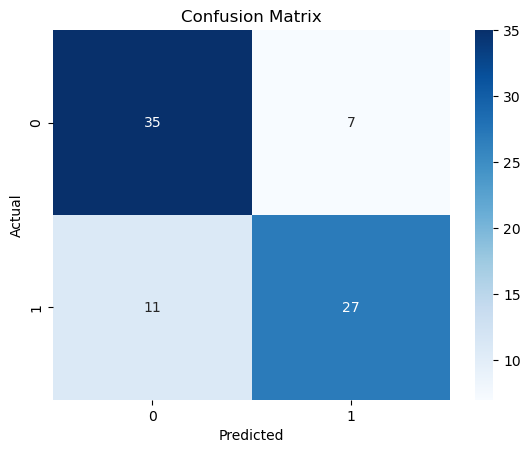

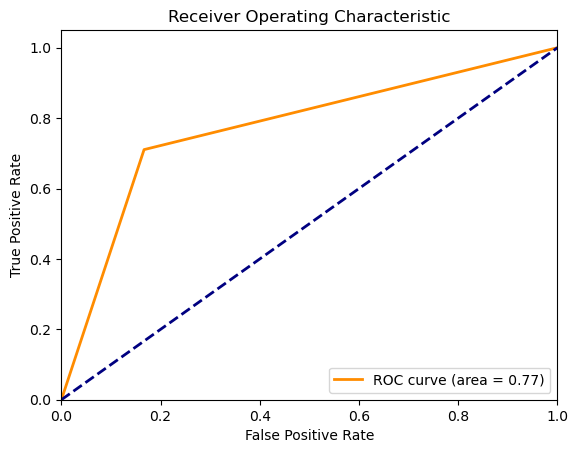

In [46]:
# Import KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7], # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'], # Distance metric used for the tree
    'p': [1, 2, 3] # Power parameter for the Minkowski metric
}

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier()

# Create the GridSearchCV model
grid = GridSearchCV(knn, param_grid, cv=5)

# Train the model
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by grid search are:", grid.best_params_)

# Predict the test set results
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<div style="background-color: black; color: white; font-size: 30px; font-weight: bold; padding: 10px;">
XGBoost
</div>

Best parameters found by grid search are: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'objective': 'binary:logistic', 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.5}
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        42
           1       0.73      0.71      0.72        38

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



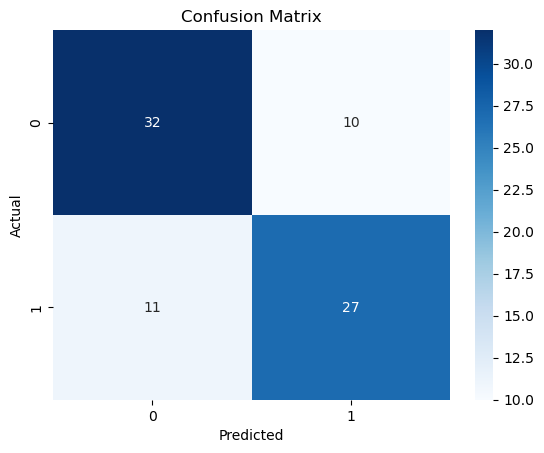

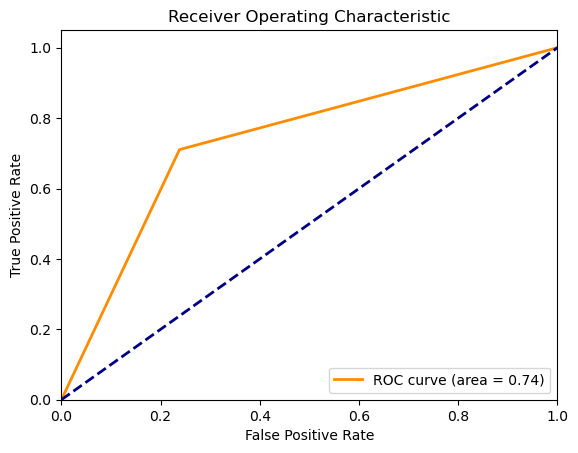

In [47]:
# Import XGBoost and other libraries
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DMatrix from the data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameter grid
param_grid = {
    'objective': ['binary:logistic'], # Specify the learning task and the corresponding learning objective
    'n_estimators': [200, 300], # Number of boosting rounds
    'max_depth' : [4, 5, 6], # Maximum tree depth for base learners
    'learning_rate': [0.1], # Boosting learning rate
    'subsample': [0.5], # Subsample ratio of the training instances
    'colsample_bytree': [0.5], # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, ], # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_lambda': [1.0], # L2 regularization term on weights
    'reg_alpha': [1.0] # L1 regularization term on weights
}

# Create the GridSearchCV model
grid = xgb.XGBClassifier() # Initialize the XGBoost classifier
grid = GridSearchCV(grid, param_grid, cv=5) # Perform grid search with 5-fold cross validation

# Train the model
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by grid search are:", grid.best_params_)

# Predict the test set results
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<div style="background-color: black; color: white; font-size: 30px; font-weight: bold; padding: 10px;">
SVM
</div>

Best parameters found by grid search are: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.76      0.76      0.76        38

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



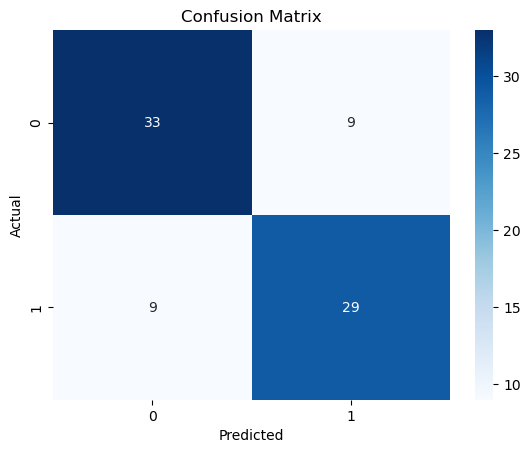

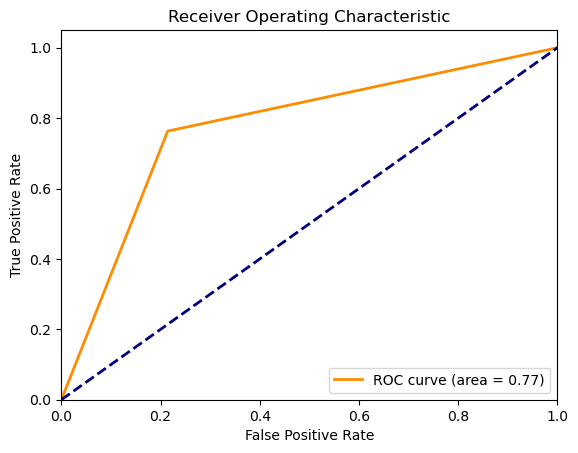

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Create a SVC model
svc = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV model
grid = GridSearchCV(svc, param_grid, cv=5)  # Perform grid search with 5-fold cross-validation

# Train the model
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by grid search are:", grid.best_params_)

# Predict the test set results
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
